In [1]:
%cd /content/drive/MyDrive/"Colab Notebooks"/MCUT/R911R912
!pwd
!ls

/content/drive/MyDrive/Colab Notebooks/MCUT/R911R912
/content/drive/MyDrive/Colab Notebooks/MCUT/R911R912
 ARO1_pearsonr_corr.csv		       'ARO2_可控_Feature Selection.ipynb'
'ARO1_不可控_Feature Selection.ipynb'   ARO2_可控_Xgboost.ipynb
 ARO1_不可控_Xgboost.ipynb	       'R911R912 _ARO1_R2.xlsx'
'ARO1_可控_Feature Selection.ipynb'     R911R912.pptx
 ARO1_可控_Xgboost.ipynb	       'R911R912 _明志蔡教授_R2.xlsx'
 ARO2_pearsonr_corr.csv		        test.csv
'ARO2_不可控_Feature Selection.ipynb'   Untitled0.ipynb
 ARO2_不可控_Xgboost.ipynb


In [2]:
import pandas as pd
path = "R911R912 _明志蔡教授_R2.xlsx"
xls = pd.ExcelFile(path)
sheets = xls.sheet_names
display(sheets)

['R911R912_TAG清單',
 'R911R912_TAG相關錶點資料(停用)',
 'R911R912_TAG相關錶點資料(X)',
 '目標值(Y)相關錶點資料']

In [3]:
df = xls.parse(sheets[2])
df.columns.values[2] = "time"
df = df.iloc[:,2:]
for i in df.columns[1:]:
  df[i] = pd.to_numeric(df[i],errors='coerce')

df

,time,ARO2-DCS-FI91304,ARO2-DCS-FI91401,ARO2-DCS-FI914A2,ARO2-DCS-FI914A3,ARO2-DCS-FI914B2,ARO2-DCS-FI914B3,ARO2-DCS-FI91501,ARO2-DCS-FI91502,ARO2-DCS-FI91503,ARO2-DCS-FI91504,ARO2-DCS-FI91601,ARO2-DCS-FI91602,ARO2-DCS-FI91701,ARO2-DCS-FI91702,ARO2-DCS-FI91704,ARO2-DCS-FI91705,ARO2-DCS-FI93201,ARO2-DCS-FI94701,ARO2-DCS-FI94702,ARO2-DCS-FIC91101,ARO2-DCS-FIC91102,ARO2-DCS-FIC91103,ARO2-DCS-FIC91104,ARO2-DCS-FIC91201,ARO2-DCS-FIC91202,ARO2-DCS-FIC91203,ARO2-DCS-FIC91204,ARO2-DCS-FIC91301,ARO2-DCS-FIC91302,ARO2-DCS-FIC91303,ARO2-DCS-PI91301,ARO2-DCS-PI91303,ARO2-DCS-PI913A1,ARO2-DCS-PI913B1,ARO2-DCS-PI91605,ARO2-DCS-PI91606,ARO2-DCS-PI91705,ARO2-DCS-PI91706,ARO2-DCS-PIC91102,...,#900 LOADING.Value,ARO2-DCS-R911_2_A_FA,ARO2-DCS-R911_2_HF,ARO2-DCS-R911_2_L2_A,ARO2-DCS-R911_2_L3_A,ARO2-DCS-R911_2_L4_A,ARO2-DCS-R911_2_XF,ARO2-DCS-RV_CYC_T,ARO2-DCS-RV_STEP_T,ARO2-DCS-RV1_BED_P,ARO2-DCS-RV1_ZONE_P,ARO2-DCS-RV2_BED_P,ARO2-DCS-RV2_ZONE_P,ARO2-DCS-TI91101,ARO2-DCS-TI91102,ARO2-DCS-TI91103,ARO2-DCS-TI91201,ARO2-DCS-TI91202,ARO2-DCS-TI91203,ARO2-DCS-TI91401,ARO2-DCS-TI91501,ARO2-DCS-TI91502,ARO2-DCS-TI91602,ARO2-DCS-TI91701,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-LIMS-S708@Br.Index,Unnamed: 72,ARO2-LIMS-S708@A9,Unnamed: 74,ARO2-LIMS-S708@A10+,Unnamed: 76,ARO2-LIMS-S708@Water,Unnamed: 78,ARO2-LIMS-S708@Sulfur,Unnamed: 80,新增補充錶點,ARO2-LIMS-s919@A9,ARO2-LIMS-s919@A10+,ARO2-LIMS-s919@Br.Index
0,2017-01-01 00:00:00,3.474542,1497.947144,1494.599609,1784.315796,1487.988403,1770.947021,25.988857,23.682142,25.698942,25.967953,568.646179,569.952087,620.703979,615.833862,43.765499,43.975185,902.855225,367.023285,359.723694,2.547352,0.697931,1.500730,0.102609,2.536275,0.102638,1.779679,0.700556,3.549894,3.512295,3.524819,0.037451,0.051119,NaN,NaN,1.596724,16.432173,0.000000,17.385298,8.838488,...,NaN,0.480,129.987991,0.315932,1.509901,-0.590059,122.012199,NaN,NaN,NaN,NaN,1.958136,2.0,182.125000,176.726746,178.312500,177.937500,182.982361,179.937500,186.015625,175.656250,173.800339,176.711975,178.199112,3.630703,3.090974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00,3.526301,1495.141602,1562.321289,1782.795166,1483.480591,1774.378052,23.068954,23.009315,22.766954,23.588520,559.993713,557.849182,607.068298,617.322144,43.105591,43.816513,903.495972,362.474274,364.867889,2.525834,0.700066,1.494781,0.099611,2.540714,0.101507,1.784207,0.700332,3.632102,3.479546,3.547161,0.031875,0.041250,NaN,NaN,1.650970,16.721058,0.000000,17.513103,8.769395,...,NaN,0.480,129.987991,0.315643,1.509901,-0.590059,122.012199,NaN,NaN,NaN,NaN,1.000000,2.0,182.469116,176.390808,177.937500,178.078308,183.031616,181.280151,186.789337,175.797424,173.995697,176.955658,178.028030,3.632458,2.996475,10.08,NaN,0.006,NaN,0.0,NaN,78.699997,NaN,0.04,NaN,NaN,614.0,5298.0,NaN
2,2017-01-01 02:00:00,3.509516,2083.710693,2066.136475,1804.128662,2071.642578,1793.949341,22.981131,22.855104,22.351837,22.650213,562.090881,562.743958,613.179688,619.972168,42.862934,43.622444,902.621216,371.956207,367.437836,2.499257,0.700596,1.490706,0.101244,2.516099,0.101998,1.767188,0.694860,3.574678,3.477507,3.600805,0.034445,0.043671,NaN,NaN,1.695312,16.772936,0.000000,17.578945,8.843875,...,NaN,0.480,129.987991,0.315122,1.509901,-0.590059,122.012199,NaN,NaN,NaN,NaN,24.000000,1.0,182.202911,177.125000,177.812500,178.688339,183.500839,181.811661,186.460876,176.192413,174.248077,176.993118,178.067184,3.639654,3.123798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01 03:00:00,3.418442,2058.168213,2054.372314,1769.391846,2058.044189,1770.947021,23.034639,22.991415,22.577875,22.592945,569.152771,572.116577,616.875000,620.474792,42.818066,43.500248,905.850281,368.045868,364.526550,2.547298,0.699012,1.510756,0.101651,2.522335,0.100659,1.754644,0.692855,3.559808,3.512279,3.442147,0.031195,0.042301,NaN,NaN,1.751780,16.580011,0.000000,17.473253,8.809463,...,NaN,0.480,129.987991,0.314822,1.509901,-0.590059,122.012199,NaN,NaN,NaN,NaN,23.000000,1.0,181.610016,177.990494,177.2

In [4]:
df.columns

Index(['time', 'ARO2-DCS-FI91304', 'ARO2-DCS-FI91401', 'ARO2-DCS-FI914A2',
       'ARO2-DCS-FI914A3', 'ARO2-DCS-FI914B2', 'ARO2-DCS-FI914B3',
       'ARO2-DCS-FI91501', 'ARO2-DCS-FI91502', 'ARO2-DCS-FI91503',
       'ARO2-DCS-FI91504', 'ARO2-DCS-FI91601', 'ARO2-DCS-FI91602',
       'ARO2-DCS-FI91701', 'ARO2-DCS-FI91702', 'ARO2-DCS-FI91704',
       'ARO2-DCS-FI91705', 'ARO2-DCS-FI93201', 'ARO2-DCS-FI94701',
       'ARO2-DCS-FI94702', 'ARO2-DCS-FIC91101', 'ARO2-DCS-FIC91102',
       'ARO2-DCS-FIC91103', 'ARO2-DCS-FIC91104', 'ARO2-DCS-FIC91201',
       'ARO2-DCS-FIC91202', 'ARO2-DCS-FIC91203', 'ARO2-DCS-FIC91204',
       'ARO2-DCS-FIC91301', 'ARO2-DCS-FIC91302', 'ARO2-DCS-FIC91303',
       'ARO2-DCS-PI91301', 'ARO2-DCS-PI91303', 'ARO2-DCS-PI913A1',
       'ARO2-DCS-PI913B1', 'ARO2-DCS-PI91605', 'ARO2-DCS-PI91606',
       'ARO2-DCS-PI91705', 'ARO2-DCS-PI91706', 'ARO2-DCS-PIC91102',
       'ARO2-DCS-PIC91202', 'ARO2-DCS-PIC91302', 'ARO2-DCS-PIC91304',
       '#900 LOADING.Value', 'ARO2-DCS-

In [5]:
df_1 = xls.parse(sheets[3])
df_1.columns.values[1] = "time"
df_1 = df_1.iloc[:38497,1:]
for i in df_1.columns[1:]:
  df_1[i] = pd.to_numeric(df_1[i],errors='coerce')

df_1

,time,ARO2-LIMS-S708@PX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-LIMS-s922@EB,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-s922@OX,ARO2-DCS-PX@Recovery
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00,23.077,34.433998,0.409,768.0,99.699997,1330.0,521.0,96.28
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
38492,2021-05-23 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38493,2021-05-23 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38494,2021-05-23 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38495,2021-05-23 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
x_col = ["ARO2-DCS-FI914B2", "ARO2-DCS-FI914B3", "ARO2-DCS-FI91601", "ARO2-DCS-FI91701",
     "ARO2-LIMS-S708@Br.Index", "ARO2-LIMS-S708@A9","ARO2-LIMS-S708@A10+", 
     "ARO2-LIMS-S708@Water", "ARO2-LIMS-S708@Sulfur", "ARO2-DCS-PDI91101", "ARO2-DCS-PDI91201"]


y_col= ["ARO2-LIMS-s922@PX", "ARO2-LIMS-s922@MX",
    "ARO2-LIMS-S907@PX", "ARO2-LIMS-S905@PX", "ARO2-DCS-PX@Recovery"]

col = x_col + y_col

df_2 = df[x_col].join(df_1[y_col])

y_col = x_col[9:] + y_col
x_col = x_col[:9]

df_2

,ARO2-DCS-FI914B2,ARO2-DCS-FI914B3,ARO2-DCS-FI91601,ARO2-DCS-FI91701,ARO2-LIMS-S708@Br.Index,ARO2-LIMS-S708@A9,ARO2-LIMS-S708@A10+,ARO2-LIMS-S708@Water,ARO2-LIMS-S708@Sulfur,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery
0,1487.988403,1770.947021,568.646179,620.703979,NaN,NaN,NaN,NaN,NaN,3.630703,3.090974,NaN,NaN,NaN,NaN,NaN
1,1483.480591,1774.378052,559.993713,607.068298,10.08,0.006,0.0,78.699997,0.04,3.632458,2.996475,99.699997,1330.0,34.433998,0.409,96.28
2,2071.642578,1793.949341,562.090881,613.179688,NaN,NaN,NaN,NaN,NaN,3.639654,3.123798,NaN,NaN,NaN,NaN,NaN
3,2058.044189,1770.947021,569.152771,616.875000,NaN,NaN,NaN,NaN,NaN,3.664120,3.086786,NaN,NaN,NaN,NaN,NaN
4,2066.448975,1770.947021,564.981323,614.364014,NaN,NaN,NaN,NaN,NaN,3.683519,3.091263,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38492,1191.802246,1516.573975,545.488342,629.368591,NaN,NaN,NaN,NaN,NaN,3.376228,3.603930,NaN,NaN,NaN,NaN,NaN
38493,1196.045898,1494.919434,508.997894,576.146851,NaN,NaN,NaN,NaN,NaN,3.378542,3.601583,NaN,NaN,NaN,NaN,NaN
38494,1190.460815,1494.919434,541.041016,636.753174,NaN,NaN,NaN,NaN,NaN,3.397708,3.592693,NaN,NaN,NaN,NaN,NaN
38495,1851.466797,1540.924072,547.967651,638.237244,NaN,NaN,NaN,NaN,NaN,3.344053,3.705959,NaN,NaN,NaN,NaN,NaN


In [8]:
from sklearn.preprocessing import MinMaxScaler

df_2[["ARO2-DCS-FI914B2", "ARO2-DCS-FI914B3", "ARO2-DCS-FI91601", "ARO2-DCS-FI91701"]] = df_2[["ARO2-DCS-FI914B2", "ARO2-DCS-FI914B3", "ARO2-DCS-FI91601", "ARO2-DCS-FI91701"]] / 885450

scaler = MinMaxScaler()
scaler.fit(df_2[x_col])
df_2[x_col] = scaler.transform(df_2[x_col])

In [11]:
df_2_1_8 = df_2.loc[df_2["ARO2-LIMS-s922@PX"].notna(),]
df_2_1_8

,ARO2-DCS-FI914B2,ARO2-DCS-FI914B3,ARO2-DCS-FI91601,ARO2-DCS-FI91701,ARO2-LIMS-S708@Br.Index,ARO2-LIMS-S708@A9,ARO2-LIMS-S708@A10+,ARO2-LIMS-S708@Water,ARO2-LIMS-S708@Sulfur,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery
1,0.644992,0.771469,0.951625,0.927225,0.203556,0.085714,0.0,0.000936,0.034843,3.632458,2.996475,99.699997,1330.0,34.433998,0.409,96.28
9,0.901490,0.639964,0.964904,0.931951,NaN,0.085714,0.0,0.000565,NaN,3.169971,3.612630,99.720001,1343.0,NaN,NaN,NaN
17,0.776874,0.908616,0.968137,0.942099,NaN,0.085714,0.0,0.000610,NaN,3.119967,3.738464,99.706001,1354.0,NaN,NaN,NaN
25,0.624021,0.510793,0.965218,0.938848,0.030291,0.071429,0.0,0.000570,0.061556,3.512110,3.100108,99.710999,1345.0,37.900002,0.090,96.54
33,0.895887,0.779978,0.968602,0.922512,NaN,0.071429,0.0,0.000488,NaN,3.660309,3.079428,99.717003,1355.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38457,0.786864,0.679968,0.930550,0.972153,NaN,0.098571,0.0,0.000396,NaN,3.304295,3.720349,99.711998,1578.0,NaN,NaN,NaN
38465,0.520678,0.659045,0.915336,0.961388,NaN,0.114286,0.0,0.000535,NaN,3.384821,3.463620,99.707001,1581.0,NaN,NaN,NaN
38473,0.635246,0.519952,0.928838,0.969910,0.059237,0.114286,0.0,0.000666,0.052265,3.739934,3.203956,99.706001,1604.0,36.400002,2.050,93.67
38481,0.899623,0.779978,0.924939,0.967966,NaN,0.115714,0.0,0.000344,NaN,3.800828,3.152043,99.711998,1582.0,NaN,NaN,NaN


In [12]:
df_2_1_24 = df_2.loc[df_2["ARO2-DCS-PX@Recovery"].notna(),]
df_2_1_24

,ARO2-DCS-FI914B2,ARO2-DCS-FI914B3,ARO2-DCS-FI91601,ARO2-DCS-FI91701,ARO2-LIMS-S708@Br.Index,ARO2-LIMS-S708@A9,ARO2-LIMS-S708@A10+,ARO2-LIMS-S708@Water,ARO2-LIMS-S708@Sulfur,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery
1,0.644992,0.771469,0.951625,0.927225,0.203556,0.085714,0.0,0.000936,0.034843,3.632458,2.996475,99.699997,1330.0,34.433998,0.409,96.28
25,0.624021,0.510793,0.965218,0.938848,0.030291,0.071429,0.0,0.000570,0.061556,3.512110,3.100108,99.710999,1345.0,37.900002,0.090,96.54
49,0.770612,0.901166,0.969149,0.947882,0.075778,0.057143,0.0,0.001069,0.075494,3.116917,3.651859,99.707001,1359.0,36.180000,0.830,96.56
73,0.911511,0.658461,0.968443,0.950426,0.059237,0.085714,0.0,0.000921,0.087108,3.193340,3.634108,99.707001,1365.0,35.590000,0.400,96.62
97,0.632538,0.887134,0.972526,0.953531,0.048899,0.071429,0.0,0.000717,0.096400,3.588995,3.034102,99.702003,1364.0,36.020000,0.850,96.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38377,0.637088,0.519952,0.926456,0.963932,0.065026,0.128571,0.0,0.000544,0.016260,3.404090,3.598592,99.709999,1574.0,33.987999,0.109,93.49
38401,0.812156,0.679968,0.919086,0.964191,0.068252,0.128571,0.0,0.000465,0.186992,3.802518,3.108938,99.704002,1594.0,30.421000,0.487,93.73
38425,0.901459,0.788556,0.925597,0.973162,0.050967,0.100000,0.0,0.000567,0.053426,3.268492,3.481331,99.704002,1590.0,40.040001,0.240,93.47
38449,0.617846,0.899990,0.924182,0.959240,0.053034,0.085714,0.0,0.000491,0.044135,3.489918,3.514459,99.711998,1577.0,14.680000,0.820,93.59


In [13]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
  
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
  
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)
  
  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")
  
  # Return the dataframe with missing information
  return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(df_2)
missing_values.head(20)

Your selected dataframe has 16 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
ARO2-LIMS-S708@Sulfur,37164,96.5
ARO2-LIMS-S905@PX,37164,96.5
ARO2-LIMS-S907@PX,37162,96.5
ARO2-LIMS-S708@Br.Index,37137,96.5
ARO2-DCS-PX@Recovery,37054,96.3
ARO2-LIMS-s922@MX,34668,90.1
ARO2-LIMS-s922@PX,34660,90.0
ARO2-LIMS-S708@Water,34654,90.0
ARO2-LIMS-S708@A10+,34632,90.0
ARO2-LIMS-S708@A9,34617,89.9


In [14]:
missing_values = missing_values_table(df_2_1_8)
missing_values.head(20)

Your selected dataframe has 16 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
ARO2-LIMS-S708@Sulfur,2636,68.7
ARO2-LIMS-S905@PX,2634,68.6
ARO2-LIMS-S907@PX,2631,68.6
ARO2-LIMS-S708@Br.Index,2622,68.3
ARO2-DCS-PX@Recovery,2614,68.1
ARO2-LIMS-s922@MX,355,9.3
ARO2-LIMS-S708@A10+,316,8.2
ARO2-LIMS-S708@Water,314,8.2
ARO2-LIMS-S708@A9,300,7.8


In [15]:
missing_values = missing_values_table(df_2_1_24)
missing_values.head(20)

Your selected dataframe has 16 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
ARO2-LIMS-s922@MX,237,16.4
ARO2-LIMS-s922@PX,220,15.2
ARO2-LIMS-S708@A9,213,14.8
ARO2-LIMS-S708@A10+,210,14.6
ARO2-LIMS-S708@Water,208,14.4
ARO2-LIMS-S708@Sulfur,185,12.8
ARO2-LIMS-S905@PX,185,12.8
ARO2-LIMS-S907@PX,183,12.7
ARO2-LIMS-S708@Br.Index,160,11.1


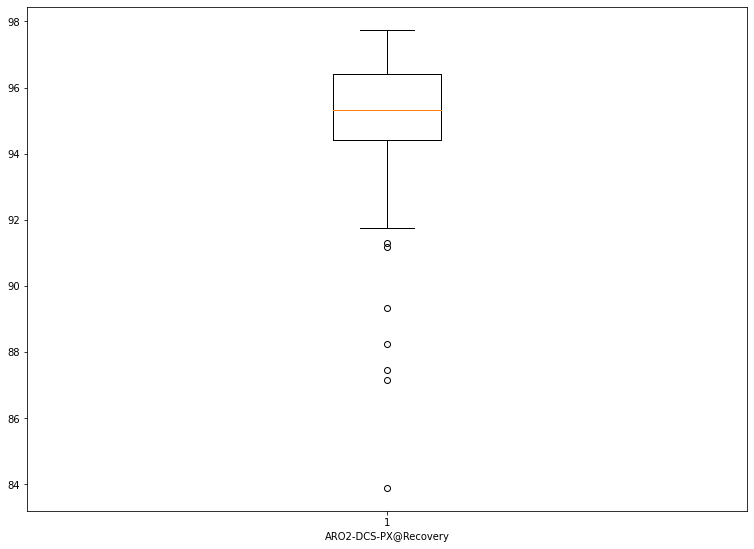

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('ARO2-DCS-PX@Recovery')
bp = ax.boxplot(df_2['ARO2-DCS-PX@Recovery'].dropna().values)

plt.show()

# plt.show()

In [ ]:
# remove outliner
import numpy as np
for j in col:
  mean = df_2[j].mean()
  std = df_2[j].std()
  outliner = []
  for i in range(len(df_2[j])):
    if (df_2.loc[i,j] > (mean - std*3) and df_2.loc[i,j] < (mean + std*3)):
      pass
    else:
      outliner = outliner + [i]
  print(j , mean, std, (mean - std*3), (mean + std*3))
  df_2.loc[outliner, j] = np.nan

ARO2-DCS-FI914B2 1581.5814651323533 448.28333074207524 236.73147290612746 2926.431457358579
ARO2-DCS-FI914B3 1651.4292906347355 383.0750220210916 502.2042245714606 2800.6543566980104
ARO2-DCS-FI91601 526.5680582453402 118.55080708016793 170.91563700483647 882.220479485844
ARO2-DCS-FI91701 588.4468408959727 131.1448490143912 195.01229385279908 981.8813879391464
ARO2-DCS-RV_CYC_T 31.67889993840027 3.344096004346309 21.64661192536134 41.7111879514392
ARO2-DCS-RV_STEP_T 79.10034186073986 7.82522887501149 55.62465523570539 102.57602848577433
ARO2-LIMS-S708@Br.Index 7.517148973168258 4.794674830961282 -6.866875519715588 21.901173466052104
ARO2-LIMS-S708@A9 0.005710443353356035 0.002664085698143733 -0.0022818137410751628 0.013702700447787233
ARO2-LIMS-S708@A10+ 0.00013974127000502585 0.0012756027728184091 -0.003687067048450202 0.003966549588460253
ARO2-LIMS-S708@Water 67.88512146289914 1145.4526752171173 -3368.472904188453 3504.243147114251
ARO2-LIMS-S708@Sulfur 0.06587246820869991 0.05201928

In [16]:
df_3 = df_2[x_col].dropna(axis="index").join(df_2.loc[df_2[x_col].dropna(axis="index").index.tolist(), y_col])
df_3

,ARO2-DCS-FI914B2,ARO2-DCS-FI914B3,ARO2-DCS-FI91601,ARO2-DCS-FI91701,ARO2-LIMS-S708@Br.Index,ARO2-LIMS-S708@A9,ARO2-LIMS-S708@A10+,ARO2-LIMS-S708@Water,ARO2-LIMS-S708@Sulfur,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery
1,0.644992,0.771469,0.951625,0.927225,0.203556,0.085714,0.0,0.000936,0.034843,3.632458,2.996475,99.699997,1330.0,34.433998,0.409,96.28
25,0.624021,0.510793,0.965218,0.938848,0.030291,0.071429,0.0,0.000570,0.061556,3.512110,3.100108,99.710999,1345.0,37.900002,0.090,96.54
49,0.770612,0.901166,0.969149,0.947882,0.075778,0.057143,0.0,0.001069,0.075494,3.116917,3.651859,99.707001,1359.0,36.180000,0.830,96.56
73,0.911511,0.658461,0.968443,0.950426,0.059237,0.085714,0.0,0.000921,0.087108,3.193340,3.634108,99.707001,1365.0,35.590000,0.400,96.62
97,0.632538,0.887134,0.972526,0.953531,0.048899,0.071429,0.0,0.000717,0.096400,3.588995,3.034102,99.702003,1364.0,36.020000,0.850,96.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38377,0.637088,0.519952,0.926456,0.963932,0.065026,0.128571,0.0,0.000544,0.016260,3.404090,3.598592,99.709999,1574.0,33.987999,0.109,93.49
38401,0.812156,0.679968,0.919086,0.964191,0.068252,0.128571,0.0,0.000465,0.186992,3.802518,3.108938,99.704002,1594.0,30.421000,0.487,93.73
38425,0.901459,0.788556,0.925597,0.973162,0.050967,0.100000,0.0,0.000567,0.053426,3.268492,3.481331,99.704002,1590.0,40.040001,0.240,93.47
38449,0.617846,0.899990,0.924182,0.959240,0.053034,0.085714,0.0,0.000491,0.044135,3.489918,3.514459,99.711998,1577.0,14.680000,0.820,93.59


In [17]:
df_3[col].describe()

,ARO2-DCS-FI914B2,ARO2-DCS-FI914B3,ARO2-DCS-FI91601,ARO2-DCS-FI91701,ARO2-LIMS-S708@Br.Index,ARO2-LIMS-S708@A9,ARO2-LIMS-S708@A10+,ARO2-LIMS-S708@Water,ARO2-LIMS-S708@Sulfur,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1070.000000,1075.000000,1075.000000,1078.000000,1024.000000
mean,0.724445,0.722784,0.934177,0.946148,0.149473,0.083812,0.003231,0.000563,0.064037,3.458083,3.326573,99.671967,1770.552558,34.557914,0.798499,94.835576
std,0.135704,0.133736,0.047346,0.045508,0.101204,0.038524,0.030614,0.000296,0.061207,0.291141,0.306734,1.410609,9429.204333,7.130298,1.630281,1.127262
min,0.407891,0.380038,0.565431,0.572686,0.000000,0.000000,0.000000,0.000061,0.000000,2.113955,1.903735,53.580002,1133.000000,0.064000,0.050000,87.150000
25%,0.627469,0.639964,0.931629,0.948784,0.066474,0.057143,0.000000,0.000379,0.025552,3.268096,3.128340,99.709000,1412.000000,33.357000,0.328250,94.057500
50%,0.728148,0.696464,0.946707,0.957710,0.127241,0.071429,0.000000,0.000525,0.055749,3.478961,3.276552,99.717003,1495.000000,35.480000,0.691000,94.920000
75%,0.890285,0.850928,0.955277,0.964555,0.220511,0.100000,0.000000,0.000695,0.081301,3.716155,3.601905,99.722000,1536.000000,37.890499,0.973750,95.702500
max,0.912393,0.919992,0.981876,0.991033,1.000000,0.457143,0.789474,0.004038,1.000000,4.050861,3.844460,99.799004,310584.000000,46.195999,39.179001,97.400000


In [19]:
df_3_describe = df_3[col].describe()
df_3_describe.iloc[:,9:16]

,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery
count,1089.000000,1089.000000,1070.000000,1075.000000,1075.000000,1078.000000,1024.000000
mean,3.458083,3.326573,99.671967,1770.552558,34.557914,0.798499,94.835576
std,0.291141,0.306734,1.410609,9429.204333,7.130298,1.630281,1.127262
min,2.113955,1.903735,53.580002,1133.000000,0.064000,0.050000,87.150000
25%,3.268096,3.128340,99.709000,1412.000000,33.357000,0.328250,94.057500
50%,3.478961,3.276552,99.717003,1495.000000,35.480000,0.691000,94.920000
75%,3.716155,3.601905,99.722000,1536.000000,37.890499,0.973750,95.702500
max,4.050861,3.844460,99.799004,310584.000000,46.195999,39.179001,97.400000


<font size = 5>Analysis</font>
*   ARO2-LIMS-S708@PX
*   ARO2-LIMS-s922@PX
*   ARO2-LIMS-s922@MX


corr

In [20]:
df_3_corr = df_3[col].corr()[y_col]
df_3_corr.iloc[:,:4]

,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX
ARO2-DCS-FI914B2,0.053077,0.076592,0.024554,-0.024442
ARO2-DCS-FI914B3,-0.033801,0.127280,-0.035880,0.035165
ARO2-DCS-FI91601,0.604997,0.604538,0.170699,-0.172568
ARO2-DCS-FI91701,0.651818,0.596804,0.162127,-0.161199
ARO2-LIMS-S708@Br.Index,0.073866,0.100034,-0.015203,0.016079
ARO2-LIMS-S708@A9,0.102674,0.061696,0.021393,-0.023291
ARO2-LIMS-S708@A10+,-0.055868,0.019752,0.003435,-0.004229
ARO2-LIMS-S708@Water,-0.011649,0.083494,0.032249,-0.035572
ARO2-LIMS-S708@Sulfur,0.021321,-0.009352,0.011031,-0.011983
ARO2-DCS-PDI91101,1.000000,-0.140032,0.079149,-0.079793


xgboost

['ARO2-DCS-FI91701', 'ARO2-DCS-FI91601', 'ARO2-LIMS-S708@A9', 'ARO2-LIMS-S708@Br.Index', 'ARO2-LIMS-S708@A10+', 'ARO2-DCS-FI914B2', 'ARO2-DCS-FI914B3', 'ARO2-LIMS-S708@Sulfur', 'ARO2-LIMS-S708@Water'] : ARO2-DCS-PDI91101
[06:39:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-DCS-PDI91101 驗證分數:'

0.7082648419125372

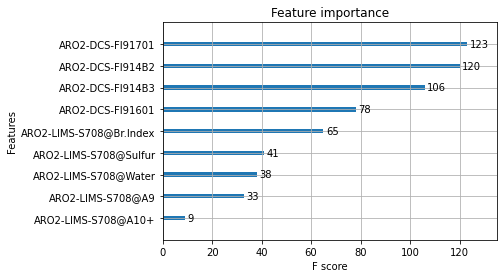

['ARO2-DCS-FI91601', 'ARO2-DCS-FI91701', 'ARO2-DCS-FI914B3', 'ARO2-LIMS-S708@Br.Index', 'ARO2-LIMS-S708@Water', 'ARO2-DCS-FI914B2', 'ARO2-LIMS-S708@A9', 'ARO2-LIMS-S708@A10+', 'ARO2-LIMS-S708@Sulfur'] : ARO2-DCS-PDI91201
[06:39:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-DCS-PDI91201 驗證分數:'

0.6778387217553932

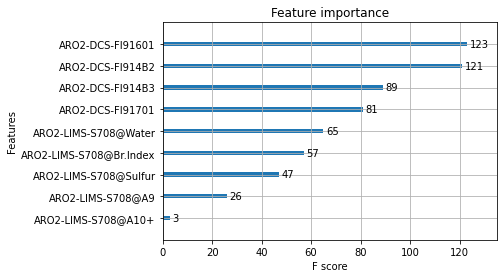

['ARO2-DCS-FI91601', 'ARO2-DCS-FI91701', 'ARO2-DCS-FI914B3', 'ARO2-LIMS-S708@Water', 'ARO2-DCS-FI914B2', 'ARO2-LIMS-S708@A9', 'ARO2-LIMS-S708@Br.Index', 'ARO2-LIMS-S708@Sulfur', 'ARO2-LIMS-S708@A10+'] : ARO2-LIMS-s922@PX
[06:39:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-s922@PX 驗證分數:'

-4.15502166437191

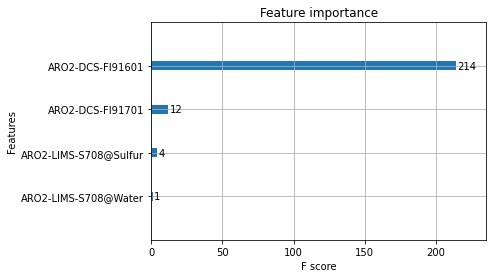

['ARO2-DCS-FI91601', 'ARO2-DCS-FI91701', 'ARO2-LIMS-S708@Water', 'ARO2-DCS-FI914B3', 'ARO2-DCS-FI914B2', 'ARO2-LIMS-S708@A9', 'ARO2-LIMS-S708@Br.Index', 'ARO2-LIMS-S708@Sulfur', 'ARO2-LIMS-S708@A10+'] : ARO2-LIMS-s922@MX
[06:39:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-s922@MX 驗證分數:'

0.6390544683776684

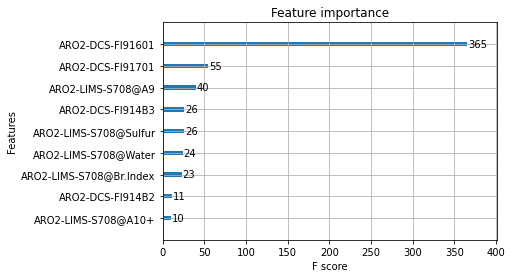

In [21]:
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sb

for i in y_col[:4]:
  y_label = i
  features = df_3_corr.abs().loc[x_col, y_label].sort_values(ascending=False).index.tolist()
  print(features,':',y_label)
  # for i in df_mean[x_col].columns:
  #   df_mean[i] = pd.to_numeric(df_mean[i],errors='coerce') 
  df_3_xgbr = df_3[features+[y_label]].dropna(axis=0)


  X = df_3_xgbr[features]
  y = df_3_xgbr[y_label]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = XGBRegressor()
  model.fit(X_train,y_train)
  display(f'{y_label} 驗證分數:',model.score(X_test,y_test))
  plot_importance(model)
  plt.show()

<font size = 5>Analysis</font>
*   ARO2-LIMS-S907@PX
*   ARO2-LIMS-S905@PX
*   ARO2-DCS-PX@Recovery

corr

In [22]:
df_3_1_24_corr = df_3[col].corr()[y_col]
df_3_1_24_corr.iloc[:,4:]

,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery
ARO2-DCS-FI914B2,0.022886,0.025253,0.020820
ARO2-DCS-FI914B3,-0.043897,0.003501,0.068419
ARO2-DCS-FI91601,0.057205,-0.014548,0.573667
ARO2-DCS-FI91701,0.015682,0.006584,-0.104309
ARO2-LIMS-S708@Br.Index,-0.069992,0.079916,-0.189847
ARO2-LIMS-S708@A9,0.036496,0.003901,0.043534
ARO2-LIMS-S708@A10+,0.014130,-0.005280,0.085221
ARO2-LIMS-S708@Water,0.033960,-0.014636,0.311763
ARO2-LIMS-S708@Sulfur,0.086314,-0.049909,0.181372
ARO2-DCS-PDI91101,-0.028737,0.018541,-0.038208


In [24]:
df_3_1_24_describe = df_3[col].describe()
df_3_1_24_describe.iloc[:,13:]

,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery
count,1075.000000,1078.000000,1024.000000
mean,34.557914,0.798499,94.835576
std,7.130298,1.630281,1.127262
min,0.064000,0.050000,87.150000
25%,33.357000,0.328250,94.057500
50%,35.480000,0.691000,94.920000
75%,37.890499,0.973750,95.702500
max,46.195999,39.179001,97.400000


['ARO2-LIMS-S708@Sulfur', 'ARO2-LIMS-S708@Br.Index', 'ARO2-DCS-FI91601', 'ARO2-DCS-FI914B3', 'ARO2-LIMS-S708@A9', 'ARO2-LIMS-S708@Water', 'ARO2-DCS-FI914B2', 'ARO2-DCS-FI91701', 'ARO2-LIMS-S708@A10+'] : ARO2-LIMS-S907@PX
[06:40:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-S907@PX 驗證分數:'

-0.07072358370153498

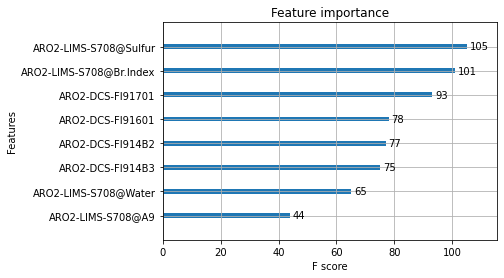

['ARO2-LIMS-S708@Br.Index', 'ARO2-LIMS-S708@Sulfur', 'ARO2-DCS-FI914B2', 'ARO2-LIMS-S708@Water', 'ARO2-DCS-FI91601', 'ARO2-DCS-FI91701', 'ARO2-LIMS-S708@A10+', 'ARO2-LIMS-S708@A9', 'ARO2-DCS-FI914B3'] : ARO2-LIMS-S905@PX
[06:40:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-S905@PX 驗證分數:'

-0.11450501087525478

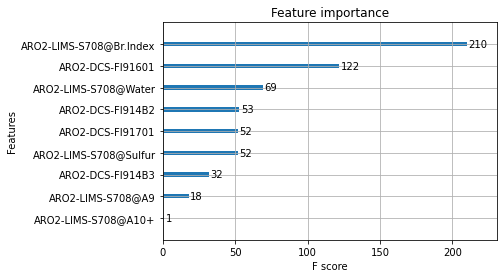

['ARO2-DCS-FI91601', 'ARO2-LIMS-S708@Water', 'ARO2-LIMS-S708@Br.Index', 'ARO2-LIMS-S708@Sulfur', 'ARO2-DCS-FI91701', 'ARO2-LIMS-S708@A10+', 'ARO2-DCS-FI914B3', 'ARO2-LIMS-S708@A9', 'ARO2-DCS-FI914B2'] : ARO2-DCS-PX@Recovery
[06:40:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-DCS-PX@Recovery 驗證分數:'

0.647476657729297

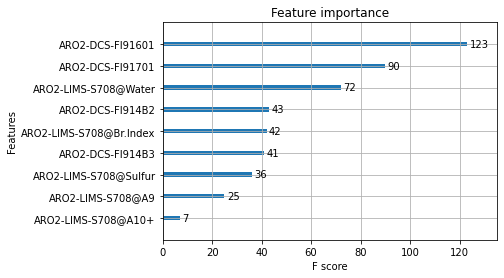

In [25]:
for i in y_col[4:]:
  y_label = i
  features = df_3_1_24_corr.abs().loc[x_col, y_label].sort_values(ascending=False).index.tolist()
  print(features,':',y_label)
  # for i in df_mean[x_col].columns:
  #   df_mean[i] = pd.to_numeric(df_mean[i],errors='coerce') 
  df_3_1_24_xgbr = df_3[features+[y_label]].dropna(axis=0)


  X = df_3_1_24_xgbr[features]
  y = df_3_1_24_xgbr[y_label]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = XGBRegressor()
  model.fit(X_train,y_train)
  display(f'{y_label} 驗證分數:',model.score(X_test,y_test))
  plot_importance(model)
  plt.show()